## CURE Clustering

Load in CURE.q which also loads in the kdtree file.

In [1]:
\l CURE.q

Clustering is useful in data mining and statistical data analysis for grouping similar data points together and identifying patterns in distributions.

The majority of clustering algorithms work well for spherical objects but break down when there are outliers in the dataset. A way to deal with these outliers is to use CURE clustering which is more rebust to datasets with large differences in size or caontaining outliers. 

In CURE clustering each cluster is represented by a certain number of representative points. These representative points are chosen from the cluster by taking the the most scattered points in the cluster and then shrinking them towards the centre of the cluster by a fixed amount. This amount is called the compression. This shrinking helps to reduce the effect of outliers. 

A k-d tree is also deployed in CURE clustering in order to store all the representative points of each cluster. 

The below creates an image with 4 different clusters, where datapts controls how many datapoints the shape has.

In [82]:
datapts:2000
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[datapts&count data]?count data
sample:data

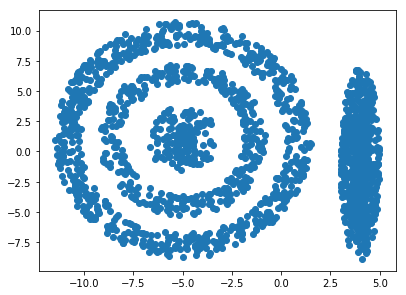

In [80]:
plt:.p.import[`matplotlib]`:pyplot;
plt[`:scatter][;]. flip sample;
plt[`:show][];

cure is the function that breaks the function up into the desired cluster groups. The function takes 4 inputs cure[sample;x;y;z], where sample is the data that needs to be clustered, x is the amount of representative points, y is the compression which is number between 0 and 1, and z is the amount of clusters that the data is to be split into. The function returns the indices of the sample grouped into clusters

In [81]:
show sample:10 2#30?20

8  6 
12 4 
11 6 
17 10
2  12
11 17
6  7 
12 12
8  6 
8  18


In [78]:
\l CURE.q
\ts cl2:.kd.cure.cure[sample;3;0.5;2]

3 14944


In [58]:
\c 25 85
\l CURE.q
\ts cl2:.kd.cure.cure[sample;3;0.5;2]

6
idx initi rep   dir dim parent clust clustIdx valid closDist closIdx
--------------------------------------------------------------------
0   2     6  6      0   0      2     2        1     10       2      
1   1     9  12 1   1   0      1     1        1     45       0      
2   3     7  3  0   0   1      3     3        1     10       0      
3   6     14 5  1   1   2      6     6        1     16       5      
4   4     18 10 1   0   3      4     4        1     41       3      
5   5     14 1  0   0   3      5     5        1     16       3      
6   6     14 5  0   1   4      6     6        0     16       5      
7   7     13 19 1   0   1      7     7        1     65       1      
8   8     3  18 0   1   0      8     8        1     2        0      
9   9     0  4  0   0   8      9     9        1     40       0      
9
idx initi rep   dir dim parent clust clustIdx valid closDist closIdx
--------------------------------------------------------------------
0   2     6  6      0   0     

14
idx initi rep               dir dim parent clust clustIdx valid closDist closIdx
--------------------------------------------------------------------------------
0   1     9        12           0   0      1     ,1       1     55.125   8      
1   7     13       19       1   1   0      7     ,7       1     65       0      
2   5     14       2        0   0   1      6     6 5      1     52       2      
14  5     14       2        0   1   2      6     6 5      0     52       2      
16  9     2.166667 4.166667 0   0   8      2     2 3 9    1     61.38889 0      
15  5     14       2        0   0   14     6     6 5      0     52       2      
10  8     3.25     17.75    1   0   8      0     0 8      1     55.125   0      
17  3     5.666667 3.666667 1   1   16     2     2 3 9    1     61.38889 0      
8   0     3.75     17.25    0   1   0      0     0 8      1     55.125   0      
18  2     5.166667 5.166667 1   0   17     2     2 3 9    1     61.38889 0      
,2
2
idx initi rep       

idx initi rep               dir dim parent clust clustIdx valid closDist closIdx
--------------------------------------------------------------------------------
0   5     14.66667 3.166667     0   0      4     4 6 5    1     81.25    17     
1   6     14.66667 5.166667 1   1   0      4     4 6 5    1     83.25    17     
19  6     14.66667 5.166667 0   0   1      4     4 6 5    0     83.25    17     
25  7     10.125   17.75    1   0   8      7     7 1 0 8  1     91.25868 8      
16  9     2.166667 4.166667 0   0   8      2     2 3 9    1     137.1753 27     
26  8     5.125    17.25    0   1   25     7     7 1 0 8  1     91.25868 8      
27  1     8.125    14.25    0   0   26     7     7 1 0 8  1     91.25868 8      
17  3     5.666667 3.666667 1   1   16     2     2 3 9    1     81.25    0      
8   2     5.166667 5.166667 0   1   0      2     2 3 9    1     90.25    1      
28  0     5.625    16.75    0   1   27     7     7 1 0 8  1     91.25868 8      
,8
1
idx initi rep          

5 4206368


In [89]:
\l CURE.q
\ts cl:.kd.cure.cure[sample;30;0.01;4]

13911 1253488


To check if the clustering is correct, the results can be plotted using matplotlib, with each cluster represented with a different colour. 

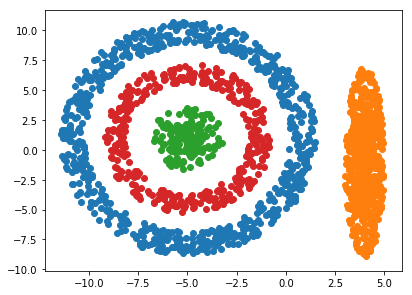

In [88]:
{plt[`:scatter][;]. flip sample[x]}each cl;
plt[`:show][];

### Adding compression to clustering

The following is an example of how adding the compression can make a difference when the dataset contains outliers and has varying sizes of clusters

In [ ]:
FCPS_SAMPLES:.p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES;
readsam:.p.import[`pyclustering.utils]`:read_sample;
sample2:readsam[FCPS_SAMPLES[`:SAMPLE_TARGET]]`

In [ ]:
plt:.p.import[`matplotlib]`:pyplot;
plt[`:scatter][;]. flip sample2;
plt[`:show][];

From the above image there it is evident that there is a large spread of data points away from the centre which could cause issues if there is a small amount of representative points used.

In [ ]:
show cl2:.kd.cure.cure[sample2;5;0;6]

In [ ]:
{plt[`:scatter][;]. flip sample2[x]}each cl2;
plt[`:show][];

The above image shows how the centre cluster and its surrounding ring are not classified correctly. This can be rectified by adding a compressing which moves the representative points of each cluster towards its centre to deal with varying shapes and outliers.

In [ ]:
show clcomp:.kd.cure.cure[sample2;5;0.1;6]

In [ ]:
{plt[`:scatter][;]. flip sample2[x]}each clcomp;
plt[`:show][];

By adding a compression of 0.1, the datapoints were correctly clusters.

## Higher dimenion clustering

The CURE clustering function also works for datasets of higher dimenions as shown below

In [ ]:
hdsample:readsam[FCPS_SAMPLES[`:SAMPLE_CHAINLINK]]`

.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][[hdsample][;0];[hdsample][;1];[hdsample][;2]];
plt[`:show][];

In [ ]:
hdcl:.kd.cure.cure[hdsample;10;0.1;2]

In [ ]:

fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][[hdsample hdcl][0][;0];[hdsample hdcl][0][;1];[hdsample hdcl][0][;2]];
ax[`:scatter][[hdsample hdcl][1][;0];[hdsample hdcl][1][;1];[hdsample hdcl][1][;2]];

plt[`:show][];